In [25]:
%reload_ext autoreload
%autoreload 2

In [2]:

import os
import sys
import seaborn as sns

# import pyLDAvis
import pyLDAvis.gensim_models

import numpy as np

import pandas as pd
from gensim import corpora, models
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize

/usr/lib/python3/dist-packages/paramiko/transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

In [5]:
# Add parent directory to path to import modules from src
rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)

from src.loader import SlackDataLoader
from src.preprocessing import Preprocessing

[nltk_data] Downloading package wordnet to /home/neba/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/neba/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# Initialize DataLoader
sl = SlackDataLoader('../Anonymized_B6SlackExport_25Nov23/anonymized/')

In [8]:
# converting all json files for all-technical-support channel to dataframe using slack_parser method from loader script
df_technical = sl.slack_parser('../Anonymized_B6SlackExport_25Nov23/anonymized/all-technical-support/')

### plot histogram of the time difference between Consecutive messages

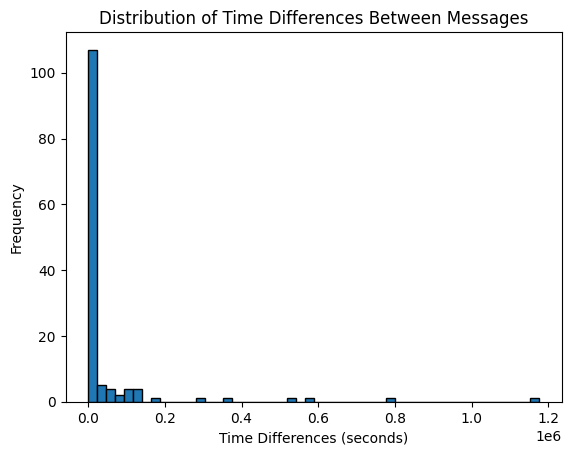

In [9]:
# Convert 'message_sent_time' to datetime format
# df['message_sent_time'] = pd.to_datetime(df['message_sent_time'])
df_technical['msg_sent_time'] = pd.to_datetime(df_technical['msg_sent_time'], unit='s')

# Sort the DataFrame by 'message_sent_time'
df_technical = df_technical.sort_values(by='msg_sent_time')

# Calculate time differences between consecutive messages
df_technical['time_difference'] = df_technical['msg_sent_time'].diff()

# Plot the distribution of time differences
plt.hist(df_technical['time_difference'].dt.total_seconds(), bins=50, edgecolor='black')
plt.xlabel('Time Differences (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Time Differences Between Messages')
plt.show()


### Plot a histogram of the time difference between Consecutive replies

### We will generate a histogram illustrating the time differences between consecutive replies for message with the highest reply count.

In [10]:
# Find the index of the maximum reply_count
max_reply_count= df_technical['reply_count'].max()
max_reply_count

9

##### let's get the message with the highest reply count(9)

In [11]:
msg_content = sl.get_channel_messages(channel_name='all-technical-support')

In [12]:
def filter_msg(msg_content):
    
    for msg in msg_content:
        if 'reply_count' in msg.keys():
            if msg['reply_count']==9:
                return msg

In [13]:
top_reply_count_message = filter_msg(msg_content)

In [14]:
# convery replies key to a dataframe
df_replies = pd.DataFrame(top_reply_count_message['replies'])

In [15]:
df_replies.columns

Index(['user', 'ts'], dtype='object')

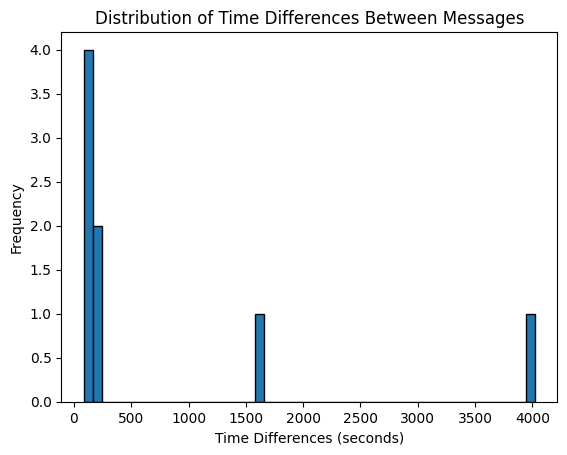

In [16]:
df_replies['ts'] = pd.to_datetime(df_replies['ts'], unit='s')

# Sort the DataFrame by 'message_sent_time'
df_replies = df_replies.sort_values(by='ts')

# Calculate time differences between consecutive messages
df_replies['time_difference'] = df_replies['ts'].diff()

# Plot the distribution of time differences
plt.hist(df_replies['time_difference'].dt.total_seconds(), bins=50, edgecolor='black')
plt.xlabel('Time Differences (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Time Differences Between Messages')
plt.show()


In [17]:
!pip3 install gensim
!pip3 install pyLDAvis

In [18]:
from gensim import corpora, models
from gensim.similarities import MatrixSimilarity
from gensim.utils import SaveLoad
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from re import sub
import pyLDAvis
from collections import Counter
from gensim.matutils import corpus2csc, sparse2full, corpus2dense
from wordcloud import WordCloud
from sklearn.utils import resample

In [19]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [20]:
df_technical.head()

,msg_type,msg_content,sender_name,msg_sent_time,msg_dist_type,time_thread_start,reply_count,reply_users_count,reply_users,tm_thread_end,channel,time_difference
110,message,Which feature did you use to make the aggregat...,Travis Butler,2022-08-22 22:03:28.184729099,text,0,0,0,0,0,,NaT
111,message,<@U03UVHCV6KB> Please ask this question in <#C...,Katherine Foster,2022-08-23 05:20:16.288839102,user,1661232016.288839,1,1,U03UVHCV6KB,1661242841.901149,,0 days 07:16:48.104110003
117,message,"done already, thanks",Travis Butler,2022-08-23 08:20:41.901149035,text,1661232016.288839,0,0,0,0,,0 days 03:00:25.612309933
96,message,Can the reports we submit be in ppt format?,Phillip Atkins,2022-08-24 17:16:35.425049067,text,1661361395.425049,4,3,"U03U93GNNVB,U03UG4Q7V42,U03UJN29Y4C",1661363591.600409,,1 days 08:55:53.523900032
97,message,ppt is not typically for written text,Katherine Foster,2022-08-24 17:16:57.528398991,text,1661361395.425049,0,0,0,0,,0 days 00:00:22.103349924


In [21]:
preprocess = Preprocessing(df_technical)

In [22]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

# clean text 
df_technical = preprocess.cleantext('msg_content', 'clean_msg_content')

# Stem words
df_technical = preprocess.stem('clean_msg_content')

/home/neba/Desktop/heart-disease-pred/network_analysis/src/preprocessing.py:121: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df[new_col] = self.df[org_col].str.replace('[^\w\s]', '')
/home/neba/Desktop/heart-disease-pred/network_analysis/src/preprocessing.py:122: FutureWarning: The default value of regex will change from True to False in a future version.
  self.df[new_col] = self.df[new_col].str.replace('\w*\d\w*', '')


In [23]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /home/neba/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/neba/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
# Used stemmer instead of lemmatizer
cleanKagslacklist = preprocess.filterSlackList(df_technical['clean_msg_content'])

In [27]:
cleanKagslacklist[1]

['plea', 'ask', 'question', 'question', 'issu', 'relat', 'platform', 'instal']

In [28]:
def makeDict(mySlackList):
    """Create dictionary from list of tokenized documents"""
    return corpora.Dictionary(mySlackList)

def makeCorpus(mySlackList,myDict):
    """Create corpus from list of tokenized documents"""
    return [myDict.doc2bow(slackmessage) for slackmessage in mySlackList]

def createLDA(myCorpus, myDictionary,myTopics=50,myPasses=10,myIterations=50,myAlpha=0.001):
    """LDA model call function"""
    return models.LdaMulticore(myCorpus, id2word=myDictionary, num_topics=myTopics, passes=myPasses,
    iterations=myIterations,alpha=myAlpha)